# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [124]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [125]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
# this will permute the range and five a random ordered index
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

In [566]:
#def P1(num_examples=10):

### STUDENT START ###
def P1(num_examples=10):
    # resize plot as size as larger grid and create the subplots with the 
    # correct number of subplots, storing axes
    plt.rcParams["figure.figsize"] = [num_examples,num_examples]
    fig, ax = plt.subplots(nrows=num_examples,ncols=num_examples)
    fig.suptitle('Figure 1:  Sample Digits', fontsize=26, fontweight='bold')
    
    #implemenet a plot function to remove labels and select examples of each label, iterated over 
    #each subplot
    for x in range(ax.shape[0]):
        indices = [int(z) for z in np.where(mini_train_labels==x)[0].tolist()[:num_examples]]
        for y in range(len(ax[x])):
            # hide axes as it is unnecessary
            ax[x][y].axes.get_yaxis().set_visible(False)
            ax[x][y].axes.get_xaxis().set_visible(False)
            ax[x][y].imshow(mini_train_data[indices[y]].reshape(
                    (int(np.sqrt(mini_train_data[indices[y]].shape[0])),
                     int(np.sqrt(mini_train_data[indices[y]].shape[0])))),cmap="Greys")

#P1(10)

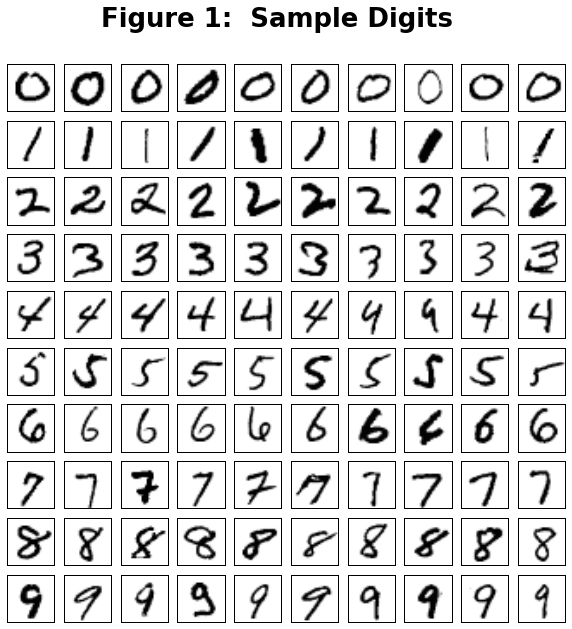

In [567]:
P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [568]:
def P2(k_values):

### STUDENT START ###
    # fit a classifier over differnet values of k
    for x in k_values:
        clf = KNeighborsClassifier(n_neighbors=x)
        clf.fit(mini_train_data,mini_train_labels)
        preds = clf.predict(dev_data)
    
        #set if condition to print out precision, recall and time for 1 neighbor and auracy for the rest
        if x==1:
            correct = sum(preds==dev_labels)
            total = len(dev_labels)
            print 'For k={}, total: {}  correct: {}  accuracy: {:.3}'.format(
                x,total, correct, 1.0 * correct / total)
            print('')
            
            distinctLabs = [int(z) for z in np.unique(dev_labels).tolist()]
            for y in distinctLabs:
                labelIndices = np.where(preds==y)[0].tolist()
                #precision is tp/(tp+fp)
                tp = sum(preds[labelIndices]==dev_labels[labelIndices])*1.0
                precision = tp/len(preds[labelIndices])
                
                #recall is tp/(tp+fn)
                fn = len(np.where(np.delete(dev_labels,labelIndices)==y)[0].tolist())
                recall = tp / (tp +fn)
                
                f1score = 2 *(precision * recall) / (precision+recall)
                
                print 'For label={}, precision: {:.3}  recall: {:.3}  F1Score: {:.3}'.format(
                y, precision, recall, f1score)
                print('')
            
            
        else:
            correct = sum(preds==dev_labels)
            total = len(dev_labels)
            print 'For k={}, total: {}  correct: {}  accuracy: {:.3}'.format(
                x,total, correct, 1.0 * correct / total)
            print('')
            
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

For k=1, total: 1000  correct: 888  accuracy: 0.888

For label=0, precision: 0.907  recall: 0.98  F1Score: 0.942

For label=1, precision: 0.89  recall: 1.0  F1Score: 0.942

For label=2, precision: 0.988  recall: 0.794  F1Score: 0.88

For label=3, precision: 0.773  recall: 0.872  F1Score: 0.82

For label=4, precision: 0.885  recall: 0.817  F1Score: 0.85

For label=5, precision: 0.927  recall: 0.835  F1Score: 0.879

For label=6, precision: 0.94  recall: 0.959  F1Score: 0.949

For label=7, precision: 0.889  recall: 0.92  F1Score: 0.904

For label=8, precision: 0.944  recall: 0.875  F1Score: 0.908

For label=9, precision: 0.777  recall: 0.821  F1Score: 0.798

For k=3, total: 1000  correct: 878  accuracy: 0.878

For k=5, total: 1000  correct: 869  accuracy: 0.869

For k=7, total: 1000  correct: 865  accuracy: 0.865

For k=9, total: 1000  correct: 863  accuracy: 0.863



ANSWER:  We see that choosing k = 1 yields the best accuracy with subsequently declining values for higher orders of k.  Within this, we would say that the 9 is the hardest value to predict given it has the worst f1 score.  As we do not have a definitive preference of recall or precision, the combined metric will serve as our basis.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [569]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    clf = KNeighborsClassifier(n_neighbors=1) 

    #iterate over the different sample sizes,
    for size in train_sizes:
        randIndices = np.random.choice(len(train_data),size)
        samp_train_data, samp_labels = train_data[randIndices], train_labels[randIndices]
        clf.fit(samp_train_data,samp_labels)  
       
        #set clock to calculate prediction time
        start = time.time()
        preds = clf.predict(dev_data)
        end = time.time()
        
        sampAcc, tLength = sum(preds==dev_labels)*1.0 / len(preds), end-start
        print 'For sample size of {}, accuracy: {:.3}  prediction time: {:.3} seconds'.format(
                size, sampAcc, end-start)
        print ' '
        accuracies += [sampAcc]
    
    return accuracies
        

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []

p4Val = P3(train_sizes, accuracies)
print p4Val

For sample size of 100, accuracy: 0.692  prediction time: 0.194 seconds
 
For sample size of 200, accuracy: 0.77  prediction time: 0.495 seconds
 
For sample size of 400, accuracy: 0.813  prediction time: 0.799 seconds
 
For sample size of 800, accuracy: 0.866  prediction time: 1.52 seconds
 
For sample size of 1600, accuracy: 0.894  prediction time: 2.96 seconds
 
For sample size of 3200, accuracy: 0.926  prediction time: 6.0 seconds
 
For sample size of 6400, accuracy: 0.933  prediction time: 12.0 seconds
 
For sample size of 12800, accuracy: 0.953  prediction time: 28.2 seconds
 
For sample size of 25000, accuracy: 0.959  prediction time: 51.6 seconds
 
[0.69199999999999995, 0.77000000000000002, 0.81299999999999994, 0.86599999999999999, 0.89400000000000002, 0.92600000000000005, 0.93300000000000005, 0.95299999999999996, 0.95899999999999996]


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [570]:
def P4(prediction=60000):

### STUDENT START ###
    #set X to create form in fit the linear regression for accuracy
    X = [[x] for x in train_sizes]
    mod = LinearRegression(fit_intercept=False)
    mod.fit(X,p4Val)
    val = mod.predict(prediction).tolist()[0]
    print 'For input of {} the predicted accuracy is {}'.format(prediction, val)
    
    #add a power transformation to bring predicted values to scale
    transformX = [[(x**(1.0/30))] for x in train_sizes]
    mod1 = LinearRegression(fit_intercept=False)
    mod1.fit(transformX,p4Val)
    val = mod1.predict(prediction**(1.0/30)).tolist()[0]
    print 'For input of {} with transform of X raised to the 1/30 power the predicted accuracy is {}'.format(prediction, val)
### STUDENT END ###

P4()

For input of 60000 the predicted accuracy is 3.39885470389
For input of 60000 with transform of X raised to the 1/30 power the predicted accuracy is 0.979085134262


ANSWER:  Obviously, it is impossible to have an accuracy greater than 1.  The practical flaw of using regression here is it is extrapolating a linear relationship to our inputted data when in reality there is a ceiling at 1.  Technically, we also are likely in violation of several OLS assumptions, but we can ignore for the sake of the exercise.  We thus can either transform Y or X.  In our example, we want to drastically cut the magnitude of X to coerce Y to a lower bound.  This achieved through root transforms.  We present the 30th root as an example. 

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

The most confused pair of digits is 4 and 9


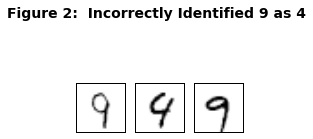

In [571]:
def P5():
### STUDENT START ###  

    #fit classifier and print prediction matrix
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(mini_train_data,mini_train_labels)
    preds = clf.predict(dev_data)
    
    cM = confusion_matrix(dev_labels,preds,labels=np.unique(dev_labels))
    print cM
    
    #locate most confused values
    np.fill_diagonal(cM, -0.0)
    maxMiss = cM.max()
    digit1 = np.where(cM==maxMiss)[0][0]
    digit2 = np.where(cM==maxMiss)[1][0]
    print ''
    print 'The most confused pair of digits is {} and {}'.format(digit1, digit2)
    
    #identify some places were the two were confuse and print
    indices9 = np.where(dev_labels==9)[0]
    incorrectIndices = np.where(preds[indices9]==4)[0][:3]
    reversedInd = [indices9[x] for x in incorrectIndices]
    
    plt.rcParams["figure.figsize"] = [3,3]
    fig, ax = plt.subplots(1,ncols=3)
    fig.suptitle('Figure 2:  Incorrectly Identified 9 as 4', fontsize=14, fontweight='bold')
    
    for y in range(len(incorrectIndices)):
        # hide axes as it is unnecessary
        ax[y].axes.get_yaxis().set_visible(False)
        ax[y].axes.get_xaxis().set_visible(False)
        ax[y].imshow(dev_data[reversedInd[y]].reshape(
                (int(np.sqrt(dev_data[reversedInd[y]].shape[0])),
                int(np.sqrt(dev_data[reversedInd[y]].shape[0])))),cmap="Greys")

    
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [572]:
def P6():
    
### STUDENT START ###
    clf = KNeighborsClassifier(n_neighbors=1)
    
    #implement the manual gaussian blur, selecting the 8 possible closest points
    #choose +/- 4 when possible but adjusts if not
    def GaussianBlur(weightPoint, weightNeighbors,array):
        newArray = np.zeros(array.shape)
        count = 0
        for x in array:
            newfeature = np.zeros(x.shape[0])
            for y in range(len(x)):
                possiblePointsBack = min(max([y,0]),8)
                possiblePointsForward = min(min(len(x)-1-y,y),8) 
                
                if possiblePointsBack >= 4 & possiblePointsForward >= 4:
                    indicesofPointsBack = [y-z-1 for z in range(possiblePointsBack)]
                    indicesofPointsForward = [y+z+1 for z in range(possiblePointsForward)]
                elif possiblePointsBack < 4:
                    diff = 4 - possiblePointsBack
                    indicesofPointsBack = [y-z-1 for z in range(possiblePointsBack)]
                    indicesofPointsForward = [y+z+1 for z in range(possiblePointsForward+diff)]
                elif possiblePointsForward < 4:
                    diff = 4 - possiblePointsForward
                    indicesofPointsBack = [y-z-1 for z in range(possiblePointsBack+diff)]
                    indicesofPointsForward = [y+z+1 for z in range(possiblePointsForward)]  
                
                indices = indicesofPointsBack+indicesofPointsForward
                neighboringAverage = np.average(x[indices])
                weightedPoint = weightPoint*x[y]+weightNeighbors*neighboringAverage
                newfeature[y] = weightedPoint
            newArray[count] = newfeature
            count += 1
        return newArray

    #blur the data
    new_mini_train_data = GaussianBlur(0.5,0.5,mini_train_data)
    clf.fit(new_mini_train_data,mini_train_labels)
    preds = clf.predict(dev_data)
    accuracy = sum(preds==dev_labels)*1.0/len(preds)
    
    print "With only blurred training data, accuracy is {:.3}".format(accuracy)
    print ''
    
    new_dev_data = GaussianBlur(0.5,0.5,dev_data)
    clf.fit(mini_train_data,mini_train_labels)
    preds1 = clf.predict(new_dev_data)
    accuracy1 = sum(preds1==dev_labels)*1.0/len(preds1)
    
    print "With only blurred dev data, accuracy is {:.3}".format(accuracy1)
    print ''
    
    clf.fit(new_mini_train_data,mini_train_labels)
    preds2 = clf.predict(new_dev_data)
    accuracy2 = sum(preds2==dev_labels)*1.0/len(preds2)
    
    print "With blurred training and blurred data, accuracy is {:.3}".format(accuracy2)
    print ''
    
    
                   
### STUDENT END ###

P6()

With only blurred training data, accuracy is 0.868

With only blurred dev data, accuracy is 0.482

With blurred training and blurred data, accuracy is 0.888



ANSWER:  In applying to the mini train set we see a high accuracy with the blur.  We note that just blurring the dev set actually results a in a much worse performance.  Intuitively, this makes sense as the model was not trained to understand the blurring.  This exercise highlights the importance of what data is used in trainging the model.  

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [573]:
def P7():

### STUDENT START ###

    #comparie binaried Naive Bayes
    nb = BernoulliNB(alpha=1.0,binarize=0.0)
    nb.fit(mini_train_data, mini_train_labels)

    pred = nb.predict(dev_data)
    accuracy = sum(pred==dev_labels)*1.0/len(dev_labels)
    
    print "The binarized data is yields an accuracy {:.3}".format(accuracy)
    print ''
    
    #implement a multi clss classifier
    wgbData = np.zeros(mini_train_data.shape)
    count = 0
    for x in mini_train_data:
        newfeature = np.zeros(x.shape[0])
        for y in range(len(x)):
            if x[y] == 0:
                newfeature[y] = 0
            elif x[y] > 0 and x[y] <= 1.0:
                newfeature[y] = 1
            else:
                newfeature[y] = 2
            
        wgbData[count] = newfeature
        count += 1
        
    wgbDevData = np.zeros(dev_data.shape)
    count = 0
    for x in dev_data:
        newfeature1 = np.zeros(x.shape[0])
        for y in range(len(x)):
            if x[y] == 0:
                newfeature1[y] = 0
            elif x[y] > 0 and x[y] <= 1.0:
                newfeature1[y] = 1
            else:
                newfeature1[y] = 2
            
        wgbDevData[count] = newfeature1
        count += 1
    
    mb = MultinomialNB()
    mb.fit(wgbData,mini_train_labels)
    pred1 = mb.predict(wgbDevData)
    
    accuracy1 = sum(pred1==dev_labels)*1.0/len(dev_labels)
    
    print "The Black/White/Grey data is yields an accuracy {:.3}".format(accuracy1)
    print ''
            
### STUDENT END ###

P7()

The binarized data is yields an accuracy 0.815

The Black/White/Grey data is yields an accuracy 0.788



ANSWER:  The multi-class does not appear to increase accuracy.  There does not appear to be a benefit from introducing the discrete set of values into the text color.  The magnitude of the color does not seem to affect the probabilities but rather the presence of color.  

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [574]:
def P8(alphas):

### STUDENT START ###
    #iterate over multiple alphas
    nb = BernoulliNB(binarize=0.0)
    nb = GridSearchCV(nb,alphas)
    nb.fit(mini_train_data,mini_train_labels)
    
    nb1 = BernoulliNB(alpha=0,binarize=0.0)
    nb1.fit(mini_train_data,mini_train_labels)
    preds=nb1.predict(dev_data)
    accuracy = sum(preds==dev_labels)*1.0/len(preds)
    print 'With alpha set to 0, the taccuracy is {:.3}'.format(accuracy)
    
    return nb
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

With alpha set to 0, the taccuracy is 0.099


In [575]:
print nb.best_params_

{'alpha': 0.1}


ANSWER:  The accuraccy with no smoothing is approximately 10%.  This is what we would expect as it is going to be able  to roughly understand one class. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [576]:
def P9():
    from sklearn.preprocessing import scale    
### STUDENT END ###
    #fit gaussian blur
    nb = GaussianNB()
    nb.fit(mini_train_data,mini_train_labels)
    preds=nb.predict(dev_data)
    accuracy = sum(preds==dev_labels)*1.0/len(preds)
    print 'For the plain Gaussain fit, the accuracy is {:.3}'.format(accuracy)
    
    #normalize the data by scaling with mean subtraction and division by standard deviation
    normalizedArray = np.zeros(mini_train_data.shape)
    for x in range(len(mini_train_data)):
        normalizedArray[x] = scale(mini_train_data[x])
    
    normalizedDev = np.zeros(dev_data.shape)
    for x in range(len(dev_data)):
        normalizedDev[x] = scale(dev_data[x])
    
    nb1 = GaussianNB()
    nb1.fit(normalizedArray,mini_train_labels)
    preds1 = nb1.predict(normalizedDev)
    accuracy = sum(preds1==dev_labels)*1.0/len(preds1)
    print 'For the transformed Gaussain fit, the accuracy is {:.3}'.format(accuracy)
    
    

### STUDENT END ###

gnb = P9()

For the plain Gaussain fit, the accuracy is 0.621
For the transformed Gaussain fit, the accuracy is 0.706


ANSWER:  Given that some features are 1 and many are 0, we get a bimodal distribution that will cause errors in the gaussian naive bayes implementation.  A first step would be to normalize data, boosting performance up.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

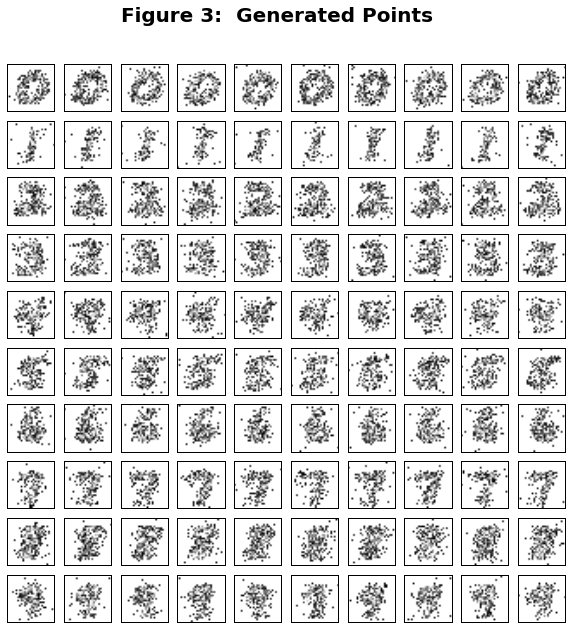

In [685]:
def P10(num_examples):

### STUDENT START ###
    #fit the original Bernoulli
    nb = BernoulliNB(alpha=1,binarize=0.0)
    nb.fit(mini_train_data,mini_train_labels)
    logProbs = nb.feature_log_prob_
    
    numb = len(np.unique(mini_train_labels))
    
    plt.rcParams["figure.figsize"] = [numb,num_examples]
    fig, ax = plt.subplots(nrows=numb,ncols=num_examples)
    fig.suptitle('Figure 3:  Generated Points', fontsize=20, fontweight='bold')
    
    #extract log probs, exponentiate, and generate random points of a uniform
    #use relationship x > 1-p to determine if fits
    for x in range(ax.shape[0]):
        for y in range(int(ax[int(x)].shape[0])):
            probs = np.array([np.exp(a) for a in logProbs[x]])
            randomPoints = np.random.rand(int(probs.shape[0]))
            finalData = np.zeros(int(randomPoints.shape[0]))
            for index in range(int(randomPoints.shape[0])):
                if randomPoints[index] >= (1-probs[index]):
                    finalData[index]=randomPoints[index]
                else:
                    finalData[index]=0
            
            ax[int(x)][int(y)].axes.get_yaxis().set_visible(False)
            ax[int(x)][int(y)].axes.get_xaxis().set_visible(False)
            ax[int(x)][int(y)].imshow(finalData.reshape(
                    (int(np.sqrt(finalData.shape[0])),
                     int(np.sqrt(finalData.shape[0])))),cmap="Greys")


### STUDENT END ###

P10(10)

ANSWER:  The generated digits resemle the shapes, but because of the potential for the uniform random to generate valid points under the calculated probabilities and miss others, we find a much blurier image.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [700]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    # train model that utilizes different binarize / bucketing values.  
    for x in range(len(buckets)):
        nb = BernoulliNB(alpha=1,binarize=buckets[x])
        nb.fit(mini_train_data,mini_train_labels)
        preds=nb.predict(dev_data)
        correctGuesses = sum(preds==dev_labels)
        totalGuess = len(dev_labels)
        correct[x] = correctGuesses
        total[x] = totalGuess
    
    print correct, total
    return correct, total

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

correct, total = P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i]*1.0/ total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

[815, 767, 217, 217, 217, 217, 217, 217, 86] [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
p(pred) <= 0.5000000000000    total = 1000    accuracy = 0.815
p(pred) <= 0.9000000000000    total = 1000    accuracy = 0.767
p(pred) <= 0.9990000000000    total = 1000    accuracy = 0.217
p(pred) <= 0.9999900000000    total = 1000    accuracy = 0.217
p(pred) <= 0.9999999000000    total = 1000    accuracy = 0.217
p(pred) <= 0.9999999990000    total = 1000    accuracy = 0.217
p(pred) <= 0.9999999999900    total = 1000    accuracy = 0.217
p(pred) <= 0.9999999999999    total = 1000    accuracy = 0.217
p(pred) <= 1.0000000000000    total = 1000    accuracy = 0.086


ANSWER: Less stringent restrictions is better for training the Naive Bayes.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()